<h1>Wavelet Transform On EEG Data</h1>

In [3]:
# Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Package for processing EDF++ files
import mne

<h2>Data Loading & Pre-Processing</h2>

In [4]:
# Necessary file names ready to go:
path = r"C:\Users\Jason Ha\Documents\University\4th Year\Thesis Project (Repo)\Jupyter Notebooks\Active Projects\mass_data\01-02-0001_PSG"
file = r"01-02-0001_PSG.edf"
scorer_annot_1 = r"01-02-0001_Annotations.csv"
scorer_annot_2 = r"01-02-0001_Annotations2.csv"
sleep_stages_filename = r"01-02-0001_Stages.edf"

# Load raw MNE file. Preload = False (Save hard drive memory):
raw_file = path + "\\" + file
raw = mne.io.read_raw_edf(raw_file, preload=False, verbose=False)

# Load annotations per the sleep stage EDF file into workspace
sleep_stages_file = path + "\\" + sleep_stages_filename
stages = mne.read_annotations(sleep_stages_file)

# Set the annotations onto the raw file:
raw.set_annotations(stages)

# Get the event and event_id from the annotations:
event, event_id = mne.events_from_annotations(raw)

# Create epochs from the event and event_id
epochs = mne.Epochs(raw, event, event_id, tmin=0.0, tmax=20, baseline=None) # 20 second epochs (based off stage annotations)

# Create dataframe from epochs
epochs_df = epochs.to_data_frame()

<ipython-input-4-9c3d9df424b6>:10: RuntimeWarning: 2 channel names are too long, have been truncated to 15 characters:
['EOG Lower Vertic', 'EOG Upper Vertic']
  raw = mne.io.read_raw_edf(raw_file, preload=False, verbose=False)


Used Annotations descriptions: ['Sleep stage 1', 'Sleep stage 2', 'Sleep stage 3', 'Sleep stage 4', 'Sleep stage ?', 'Sleep stage R', 'Sleep stage W']
1419 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 1419 events and 5121 original time points ...
0 bad epochs dropped
Converting "time" to "<class 'numpy.int64'>"...


In [5]:
epochs_df.head()

channel                   EOG Right Horiz  Resp nasal  EEG Pz-LER  \
condition     epoch time                                            
Sleep stage ? 0     0          -32.573788   20.132534 -257.963051   
                    4          -31.816386   19.894342 -257.963051   
                    8          -30.806517   19.822884 -257.963051   
                    12         -28.534311   19.965799 -257.963051   
                    16         -32.321321   20.251629 -257.963051   

channel                   EEG Fp1-LER  EMG Chin  EEG Fpz-LER  EEG Cz-LER  \
condition     epoch time                                                   
Sleep stage ? 0     0       -4.917746 -1.832980    -8.070029    1.344633   
                    4       -3.529177  2.874355    -5.121987    5.323181   
                    8       -5.170213  2.824788    -8.198205    1.087952   
                    12      -6.306314 -6.617764    -9.608139   -1.727513   
                    16      -6.053847 -7.633892   -11.915302   -6.347763   

channel                   EEG O1-LER  EEG C4-LER  EEG F3-LER  ...  EEG F8-LER  \
condition     epoch time                                      ...               
Sleep stage ? 0     0     -12.849489   -3.166658   -4.515893  ...  -21.353666   
                    4      -9.025625    0.124147   -2.478145  ...  -18.565971   
                    8     -13.612672   -3.801030   -4.897970  ...  -22.874228   
                    12    -13.485475   -4.435402   -4.897970  ...  -21.860520   
                    16    -12.849489   -6.084769   -6.298922  ...  -22.240660   

channel                   EOG Upper Verti  EEG T6-LER  EEG T4-LER  EEG F7-LER  \
condition     epoch time                                                        
Sleep stage ? 0     0          -71.761064  -11.318982  -14.040031    0.954687   
                    4          -67.964469   -6.939513   -9.458811    1.593110   
                    8          -67.205149   -8.065662  -10.983238    0.954687   
                    12         -64.420979   -5.312853   -8.696598    2.231534   
                    16         -63.408554   -3.561065   -8.061420    0.954687   

channel                   EEG P3-LER       ECG I  EEG A2-LER  EEG F4-LER  \
condition     epoch time                                                   
Sleep stage ? 0     0      -5.192701 -242.737900  -46.938327   -8.973465   
                    4       0.959612 -257.192393  -40.960060   -7.190436   
                    8      -3.780958 -255.987852  -40.069680  -11.265931   
                    12     -3.909298 -246.351523  -44.521581  -12.539523   
                    16     -5.449381 -253.578770  -48.854234  -14.457872   

channel                   EEG T3-LER  
condition     epoch time              
Sleep stage ? 0     0     -12.428005  
                    4     -10.120842  
                    8     -10.505369  
                    12     -8.710908  
                    16     -8.454557  

[5 rows x 27 columns]

In [6]:
eeg_epochs_df = epochs_df[['EEG C3-LER']]
eeg_epochs = eeg_epochs_df.loc["Sleep stage 2", :]
eeg_epochs

channel      EEG C3-LER
epoch time             
13    0       -4.456643
      4       -6.138015
      8       -6.138015
      12      -4.973989
      16      -1.740580
...                 ...
1409  19983    4.976825
      19987    4.718152
      19991    6.658197
      19995    6.270188
      19999    7.692888

[3815145 rows x 1 columns]

In [7]:
scorer_1 = path + "\\" + scorer_annot_1
s1_df = pd.read_csv(scorer_1)
s1_df.columns = ['start', 'duration']
s1_df['end'] = s1_df['start'] + s1_df['duration']

# Make a temporary column for the start times rounded to the nearest integer:
s1_df['start_floor'] = s1_df['start'].astype('int32')

scorer_2 = path + "\\" + scorer_annot_2
s2_df = pd.read_csv(scorer_2)
s2_df.columns = ['start', 'duration']
s2_df['end'] = s2_df['start'] + s2_df['duration']

# Make a temporary column for the start times rounded to the nearest integer:
s2_df['start_floor'] = s2_df['start'].astype('int32')

# Get the 'inner join' of the two scorers' dataframes in order to get the ground truth.
scorer_inner = pd.merge(s1_df, s2_df, how='inner', on=['start_floor'])
scorer_inner.head()

# Take the mean of the start (onset) tie, duration of the spindle and the end time for each scorer:
scorer_final = pd.DataFrame()
scorer_final['start'] = (scorer_inner['start_x'] + scorer_inner['start_y']) / 2
scorer_final['duration'] = (scorer_inner['duration_x'] + scorer_inner['duration_y']) / 2
scorer_final['end'] = (scorer_inner['end_x'] + scorer_inner['end_y']) / 2

In [8]:
# Get all the unique epochs from the dataframe:
temp = epochs_df.reset_index(drop=False)
tmp = temp[temp['condition'] == 'Sleep stage 2']
epoch_list = tmp['epoch'].unique()

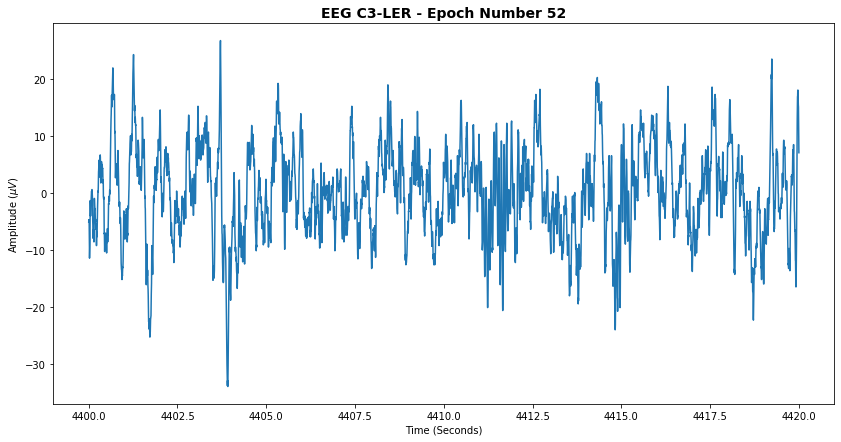

<Figure size 432x288 with 0 Axes>

In [32]:
epoch = epoch_list[52]
example = eeg_epochs.loc[epoch]
signal = example['EEG C3-LER']

# Make time axis reflect the true time-value it was extracted from (from full EEG recording)
time = example.index.values / 1000
time = time + (epoch * 20)

fig = plt.figure(figsize=(14,7))
plt.plot(time, signal)
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude ($\mu V$)')
plt.title("EEG C3-LER - Epoch Number {}".format(52), fontsize=14, fontweight='bold')
plt.show()
plt.savefig("epoch_example.png", dpi=300)

In [33]:
# Import signal processing functions from Scipy
from scipy.signal import butter, lfilter, sosfilt, filtfilt
from scipy.fftpack import fft, fftfreq, fftshift
from scipy.signal import hilbert
from scipy.signal.windows import hann

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [34]:
sampling_rate = raw.info['sfreq']
signal_filtered = butter_bandpass_filter(signal, 10, 16, sampling_rate, order=5)

In [35]:
# Need to determine if there are any expert annotations that occur in the epoch itself.
condition = (scorer_final['start'] >= min(time)) & (scorer_final['end'] <= max(time))
scorer_annotations = scorer_final[condition].reset_index(drop=True)
scorer_annotations

,start,duration,end


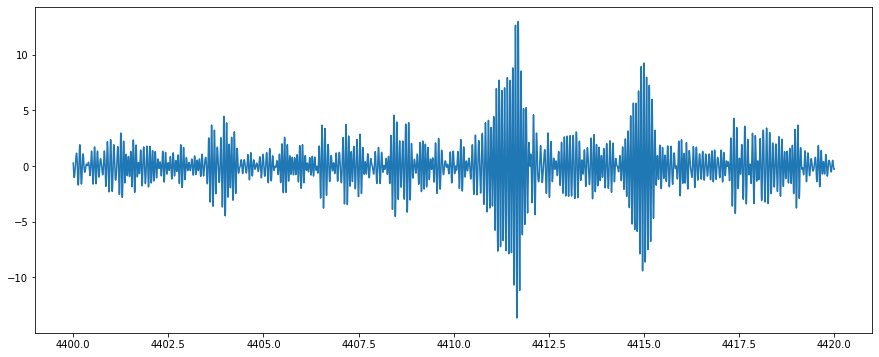

In [36]:
fig = plt.figure(figsize=(15,6))
plt.plot(time, signal_filtered)
plt.show()

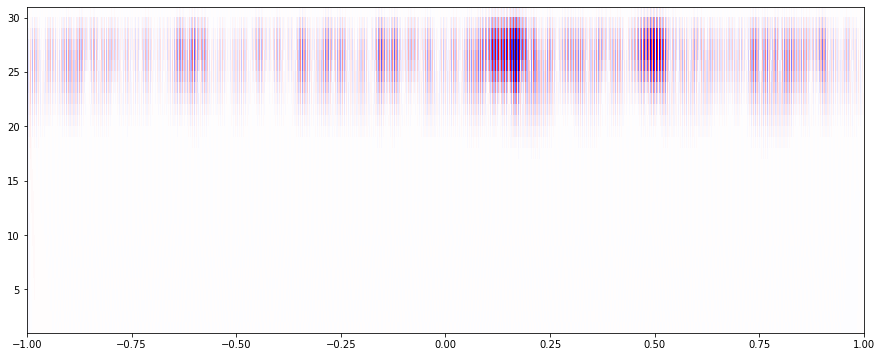

In [41]:
from scipy.signal import cwt, morlet
import scipy

# Widths to use for the CWT:
widths = np.arange(1,31)

# Perform the CWT using a Morlet wavelet:
cwtmatr = cwt(signal_filtered, scipy.signal.ricker, widths)

# Generate the plot for the spectrogram from the CWT:
fig = plt.figure(figsize=(15,6))
plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='seismic', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()
